In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import re

# Run Experiment  One and Read in Results

* Use one-word term
* Each term has a 100% chance or 75% chance to be included in the index or fingerprint

In [2]:
# POWERS = [0, 4, 3, 2, 1]
POWERS = [0, 2]
CHANCE = ['100', '93.75', '87.5', '75', '50'] # percentage
INDEX_TIME_UNIT = 1000 # number of tweets
QUERY_TIME_UNIT = 1000
SIMILARITY_THRE = 0.5
NUMBER_OF_EPOCHS = 3
OUTPUT_DIR = "./output_expm1/"

In [3]:
# This function runs the experiment and compares the results including:
# - the size of the index and doc lists 
# - time for constructing the index and executing query 
# - number of lookups before finding the match

def run_expm1():
#     for p in POWERS:
#         runSketchTweets("SketchingTweet-v1", INDEX_TIME_UNIT, QUERY_TIME_UNIT, p, SIMILARITY_THRE, NUMBER_OF_EPOCHS, OUTPUT_DIR)
    summary, termfreq, query_result_similarity_lookup, index_time, query_time = load_expm1_csv(OUTPUT_DIR)
    return summary, termfreq, query_result_similarity_lookup, index_time, query_time

In [4]:
def runSketchTweets(jar, index_time_unit, query_time_unit, chance_power, similarity_threshold, n, output_dir):
    for epoch in range (1, n+1):
        os.system("java -jar ./{}.jar -iu {} -qu {} -p {} -s {} -n {} -o {}"
        .format(jar, index_time_unit, query_time_unit, chance_power, similarity_threshold, epoch, output_dir))

In [5]:
def load_expm1_csv(directory):
    '''
    Returns a list of results.
    The results are ordered in the form of [summary, termfreq, query_results_similarity_lookups, index_time, query_time] 
    '''

    for root, _, files in os.walk(directory):
        for file in files:
            filename = re.match( r'Epoch_(\d+)_iu_(\d+)_qu_(\d+)_p_(\d+)_s_([\.\d]+)_(.+).csv', file)  
#             print(filename.group(3),filename.group(4),filename.group(5),filename.group(6))
            name = filename.group(6)
            power = filename.group(4)

            if name == "summary":
                if power == '0':
                    summary0 = pd.read_csv(directory + "/" + file, header=None)
                elif power == '2':
                    summary1 = pd.read_csv(directory + "/" + file, header=None)

            if name == "term_freq":
                if power == '0':
                    termfreq0 = pd.read_csv(directory + "/" + file, header=None)
                elif power == '2':
                    termfreq1 = pd.read_csv(directory + "/" + file, header=None)
                    
            if name == "query_result":
                if power == '0':
                    query_result0 = pd.read_csv(directory + "/" + file, header=None)
                elif power == '2':
                    query_result1 = pd.read_csv(directory + "/" + file, header=None)
                    
            if name == "query_similarity":
                if power == '0':
                    query_similarity0 = pd.read_csv(directory + "/" + file, header=None)
                elif power == '2':
                    query_similarity1 = pd.read_csv(directory + "/" + file, header=None)
                    
            if name == "lookups":
                if power == '0':
                    lookups0 = pd.read_csv(directory + "/" + file, header=None)
                elif power == '2':
                    lookups1 = pd.read_csv(directory + "/" + file, header=None)
            
            if name == "index_time":
                epoch = filename.group(1)
                if power == '0':
                    if epoch == '1':
                        index_time0_1 = pd.read_csv(directory + "/" + file, header=None)
                    elif epoch == '2':
                        index_time0_2 = pd.read_csv(directory + "/" + file, header=None)
                    elif epoch == '3':
                        index_time0_3 = pd.read_csv(directory + "/" + file, header=None)
                elif power == '2':
                    if epoch == '1':
                        index_time1_1 = pd.read_csv(directory + "/" + file, header=None)
                    elif epoch == '2':
                        index_time1_2 = pd.read_csv(directory + "/" + file, header=None)
                    elif epoch == '3':
                        index_time1_3 = pd.read_csv(directory + "/" + file, header=None)
                    
            if name == "query_time":
                epoch = filename.group(1)
                if power == '0':
                    if epoch == '1':
                        query_time0_1 = pd.read_csv(directory + "/" + file, header=None)
                    elif epoch == '2':
                        query_time0_2 = pd.read_csv(directory + "/" + file, header=None)
                    elif epoch == '3':
                        query_time0_3 = pd.read_csv(directory + "/" + file, header=None)
                elif power == '2':
                    if epoch == '1':
                        query_time1_1 = pd.read_csv(directory + "/" + file, header=None)
                    elif epoch == '2':
                        query_time1_2 = pd.read_csv(directory + "/" + file, header=None)
                    elif epoch == '3':
                        query_time1_3 = pd.read_csv(directory + "/" + file, header=None)
                        

    summary = pd.concat([summary0, summary1.iloc[:,1]], 1)
    summary.columns = ['', '100% chance','75% chance']
#     print(summary)
    
    termfreq0.columns = ['term', '100% chance']
    termfreq1.columns = ['term','75% chance']
    termfreq = (termfreq0, termfreq1)
#     print(termfreq[0])
#     print(termfreq[1])
    
    query_result_similarity_lookup = pd.concat([query_result0, query_result1, query_similarity0, query_similarity1, lookups0, lookups1], 1)
    query_result_similarity_lookup.columns = ['result_100%','result_75%', 'similarity_100%','similarity_75%', 'num_of_lookups_100%','num_of_lookups_75%']
#     print(query_result_similarity_lookup)
    
    index_time = pd.concat([index_time0_1, index_time0_2, index_time0_3, index_time1_1, index_time1_2, index_time1_3], 1)
    index_time.columns = ['index_time_100%_epoch1','index_time_100%_epoch2','index_time_100%_epoch3',
                          'index_time_75%_epoch1','index_time_75%_epoch2','index_time_75%_epoch3']
#     print(index_time)
        
    query_time = pd.concat([query_time0_1, query_time0_2, query_time0_3, query_time1_1, query_time1_2, query_time1_3], 1)
    query_time.columns = ['query_time_100%_epoch1','query_time_100%_epoch2','query_time_100%_epoch3',
                          'query_time_75%_epoch1','query_time_75%_epoch2','query_time_75%_epoch3']
#     print(query_time)

    return summary, termfreq, query_result_similarity_lookup, index_time, query_time


In [6]:
summary, termfreq, query_result_similarity_lookup, index_time, query_time = run_expm1()    

# Process Results

## Index size comparison

In [7]:
summary

,,100% chance,75% chance
0,Epoch,1,1
1,Chance,100.0%,75.0%
2,Index timing unit,1000,1000
3,Query timeing unit,1000,1000
4,Similarity threshold,0.500000,0.500000
5,Number of queries,4638,4638
6,Number of indexed tweets,41176,41176
7,Index size,86526,65756


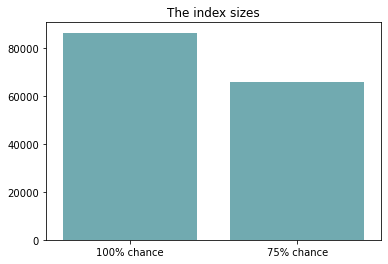

The index size is 24.004% smaller when terms has a 75% chance to be indexed or included in the fingerfrints.


In [8]:
def compare_index_size(sizes, title):
    data = pd.to_numeric(sizes) 
    ratio = round(((data['100% chance'] - data['75% chance']) / data['100% chance']) * 100, 3)
    layer = sns.barplot(x=data.index, y=data.to_list(), color="#66B3BA")
    plt.title(title)
    plt.show()
    print('The index size is ' + str(ratio) + "% smaller when terms has a 75% chance to be indexed or included in the fingerfrints.")


compare_index_size(summary.iloc[7,1:], "The index sizes")

## Documnet list length comparison

In [9]:
termfreq[0]["100% chance"].value_counts() 

1      55048
2      11668
3       5116
4       2969
5       1944
       ...  
582        1
160        1
224        1
390        1
319        1
Name: 100% chance, Length: 353, dtype: int64

In [10]:
termfreq[1]["75% chance"].value_counts()

1       42343
2        8681
3        3803
4        2186
5        1429
        ...  
279         1
407         1
1111        1
216         1
319         1
Name: 75% chance, Length: 318, dtype: int64

The average document list length: 
[4.96099438319118, 5.000714763671756]


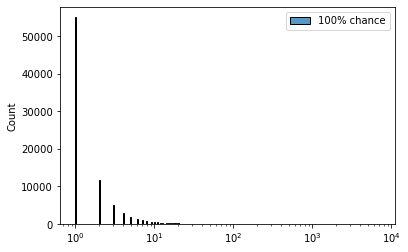

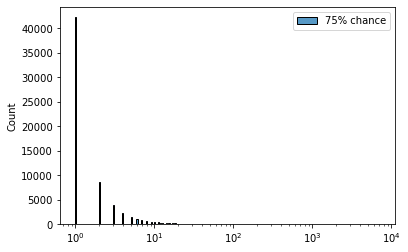

In [11]:
def compare_doclist_len(termfreq):
    lengths = [np.array(i.iloc[:,1:2].squeeze()) for i in termfreq]
    avgs = [np.average(l) for l in lengths]
    medians = [np.median(l) for l in lengths]
    print('The average document list length: ')
    print(avgs)
    layer1 = sns.histplot(data=termfreq[0], log_scale=True, color="#66B3BA")
    plt.show()
    layer2 = sns.histplot(data=termfreq[1], log_scale=True, color="#77B3BA")
    plt.show()

compare_doclist_len(termfreq)

## Query Recall
what we searched correctly / what are truely similar

In [12]:
query_result_similarity_lookup

,result_100%,result_75%,similarity_100%,similarity_75%,num_of_lookups_100%,num_of_lookups_75%
0,-1,-1,0.0,0.00000,-1,-1
1,-1,39509,0.0,0.50000,-1,1064
2,-1,-1,0.0,0.00000,-1,-1
3,-1,-1,0.0,0.00000,-1,-1
4,29741,12539,0.5,0.54545,44760,97185
...,...,...,...,...,...,...
4633,-1,-1,0.0,0.00000,-1,-1
4634,-1,-1,0.0,0.00000,-1,-1
4635,-1,-1,0.0,0.00000,-1,-1
4636,-1,-1,0.0,0.00000,-1,-1


In [13]:
is_true_similar = query_result_similarity_lookup['result_100%'] != -1
true_similar = query_result_similarity_lookup[is_true_similar]
num_true_similar = true_similar.shape[0]
true_similar

,result_100%,result_75%,similarity_100%,similarity_75%,num_of_lookups_100%,num_of_lookups_75%
4,29741,12539,0.50000,0.54545,44760,97185
13,27190,27190,0.50000,0.60000,4332,3180
19,30252,39853,0.54545,0.50000,31504,2768
21,3775,3775,0.55556,0.71429,14463,6454
22,38576,40016,0.50000,0.54545,10892,3487
...,...,...,...,...,...,...
4618,41115,41115,0.50000,0.60000,132,110
4619,30963,30963,1.00000,1.00000,10170,1788
4627,41111,41111,0.95000,0.94444,440,396
4628,19582,19582,1.00000,1.00000,864,135


In [14]:
is_correct_search = true_similar['result_100%'] == true_similar['result_75%']
correct_search = true_similar[is_correct_search]
num_correct_search = correct_search.shape[0]
correct_search

,result_100%,result_75%,similarity_100%,similarity_75%,num_of_lookups_100%,num_of_lookups_75%
13,27190,27190,0.50000,0.60000,4332,3180
21,3775,3775,0.55556,0.71429,14463,6454
23,38450,38450,1.00000,1.00000,2778,2310
37,2766,2766,0.66667,0.66667,19740,19740
39,38126,38126,0.50000,0.57143,4824,4214
...,...,...,...,...,...,...
4618,41115,41115,0.50000,0.60000,132,110
4619,30963,30963,1.00000,1.00000,10170,1788
4627,41111,41111,0.95000,0.94444,440,396
4628,19582,19582,1.00000,1.00000,864,135


In [15]:
recall = round((num_correct_search/num_true_similar) * 100, 2)
print('Using 75% terms, we can find {}% true similar tweets'.format(recall))

Using 75% terms, we can find 61.17% true similar tweets


## Query Precision
what we searched correctly / what are think are similar

In [16]:
is_predict_similar = query_result_similarity_lookup['result_75%'] != -1
predict_similar = query_result_similarity_lookup[is_predict_similar]
num_predict_similar = predict_similar.shape[0]
predict_similar

,result_100%,result_75%,similarity_100%,similarity_75%,num_of_lookups_100%,num_of_lookups_75%
1,-1,39509,0.00,0.50000,-1,1064
4,29741,12539,0.50,0.54545,44760,97185
10,-1,27636,0.00,0.50000,-1,2328
12,-1,22602,0.00,0.50000,-1,26424
13,27190,27190,0.50,0.60000,4332,3180
...,...,...,...,...,...,...
4627,41111,41111,0.95,0.94444,440,396
4628,19582,19582,1.00,1.00000,864,135
4630,-1,40977,0.00,0.50000,-1,410
4631,-1,39622,0.00,0.50000,-1,1866


In [17]:
precision = round((num_correct_search/num_predict_similar) * 100, 2)
print('Using 75% terms, {}% tweets that we found similar are true similar tweets'.format(precision))

Using 75% terms, 43.11% tweets that we found similar are true similar tweets


## Number of lookups in correct searches

In [18]:
is_less_search = correct_search['num_of_lookups_100%'] > correct_search['num_of_lookups_75%']
less_search = correct_search[is_less_search]
num_less_search = less_search.shape[0]
less_search

,result_100%,result_75%,similarity_100%,similarity_75%,num_of_lookups_100%,num_of_lookups_75%
13,27190,27190,0.50000,0.60000,4332,3180
21,3775,3775,0.55556,0.71429,14463,6454
23,38450,38450,1.00000,1.00000,2778,2310
39,38126,38126,0.50000,0.57143,4824,4214
46,39035,39035,1.00000,1.00000,140,90
...,...,...,...,...,...,...
4618,41115,41115,0.50000,0.60000,132,110
4619,30963,30963,1.00000,1.00000,10170,1788
4627,41111,41111,0.95000,0.94444,440,396
4628,19582,19582,1.00000,1.00000,864,135


In [19]:
proportion = round((num_less_search / num_correct_search) * 100, 2)
print('Using 75% terms, {}% tweets need less lookups before correctly finding the true similar tweets'.format(proportion))

Using 75% terms, 74.93% tweets need less lookups before correctly finding the true similar tweets


In [20]:
avg_lookups_100 = np.average(np.array(correct_search['num_of_lookups_100%']))
avg_lookups_75 = np.average(np.array(correct_search['num_of_lookups_75%']))
reduce = round(((avg_lookups_100 - avg_lookups_75) / avg_lookups_100) * 100, 2)
print('Using 75% terms, {}% less lookups are needed for correctly finding the true similar tweets'.format(reduce))

Using 75% terms, 28.99% less lookups are needed for correctly finding the true similar tweets


## Index time comparison

In [21]:
index_time

,index_time_100%_epoch1,index_time_100%_epoch2,index_time_100%_epoch3,index_time_75%_epoch1,index_time_75%_epoch2,index_time_75%_epoch3
0,13.8883,13.1605,12.6777,15.3734,19.0815,14.7663
1,5.4819,5.3354,4.9195,5.9366,7.8272,5.6689
2,4.4654,5.0921,4.7809,5.5772,8.0939,7.1581
3,7.8060,8.5678,8.8230,8.2621,12.3849,9.4940
4,3.6579,3.8994,4.0735,5.3933,4.8868,6.2354
5,4.1500,3.5105,4.2924,5.1638,4.3079,5.3489
6,3.3390,3.6252,3.6754,4.0520,4.9830,4.8256
7,3.2378,3.5332,3.6743,5.2154,5.9273,3.9655
8,3.4685,3.3392,3.8461,3.7096,3.7379,3.7475
9,4.0339,5.1597,4.7213,4.5848,5.9154,4.8457


In [22]:
index_time_avgs = []
for col in index_time.columns:
    index_time_avgs.append(np.average(np.array(index_time[col])))

index_time_avgs2 = []
c = 0
acc = 0
for avg in index_time_avgs:
    if c < 2:
        acc += avg
        c += 1
        
    else:
        acc += avg
#         print(acc)
        index_time_avgs2.append(round(acc/3 , 4))
        acc = 0
        c = 0

index_time_avgs2 
print('Using 100% terms, the average time for indexing 1000 tweets is {} milliseconds'.format(index_time_avgs2[0]))
print('Using 75% terms, the average time for indexing 1000 tweets is {} milliseconds'.format(index_time_avgs2[1]))

Using 100% terms, the average time for indexing 1000 tweets is 4.6249 milliseconds
Using 75% terms, the average time for indexing 1000 tweets is 5.0983 milliseconds


## Query time comparison

In [23]:
query_time

,query_time_100%_epoch1,query_time_100%_epoch2,query_time_100%_epoch3,query_time_75%_epoch1,query_time_75%_epoch2,query_time_75%_epoch3
0,4.4004,4.3316,4.1070,1.7492,2.4905,1.5628
1,265.7165,282.9665,236.5323,231.7266,271.3285,232.8812
2,165.0658,184.3121,179.8592,103.4385,107.6736,104.9416
3,161.4901,208.5361,168.5159,105.8585,108.4243,110.1049
4,175.1204,170.5994,180.9690,100.4355,128.4212,106.4272


In [24]:
query_time_avgs = []
for col in query_time.columns:
    query_time_avgs.append(np.average(np.array(query_time[col])))

query_time_avgs2 = []
c = 0
acc = 0
for avg in query_time_avgs:
    if c < 2:
        acc += avg
        c += 1
        
    else:
        acc += avg
#         print(acc)
        query_time_avgs2.append(round(acc/3 , 4))
        acc = 0
        c = 0

query_time_avgs2 
print('Using 100% terms, the average time for querying 1000 tweets is {} milliseconds'.format(query_time_avgs2[0]))
print('Using 75% terms, the average time for querying 1000 tweets is {} milliseconds'.format(query_time_avgs2[1]))

Using 100% terms, the average time for querying 1000 tweets is 159.5015 milliseconds
Using 75% terms, the average time for querying 1000 tweets is 114.4976 milliseconds
